In [ ]:
!pip install pystan~=2.14

In [ ]:
!pip install fbprophet

In [19]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [8]:
code = 'KEL'
filename = lambda x: f'/content/drive/MyDrive/stockdata/{x}.csv'
read = filename(code)

df = pd.read_csv(read,delimiter='\t',header=None)
df.columns = ['ds','Open','High','Low','y','Volume']
df = df[['ds','y']]
df['ds'] = pd.to_datetime(df['ds'],infer_datetime_format=True)
df

# df.set_index('Time',inplace=True)

,ds,y
0,2020-01-01,4.76
1,2020-01-02,4.77
2,2020-01-03,4.62
3,2020-01-06,4.53
4,2020-01-07,4.58
...,...,...
726,2022-12-05,2.62
727,2022-12-06,2.60
728,2022-12-07,2.63
729,2022-12-08,2.56


In [10]:
train = df.iloc[:-90]
test = df.iloc[-90:]

In [11]:
prophet = Prophet(daily_seasonality=True)
prophet.fit(train)


In [12]:
future_dates = prophet.make_future_dataframe(periods=180)
predictions = prophet.predict(future_dates)

In [15]:
plot_plotly(prophet,predictions)

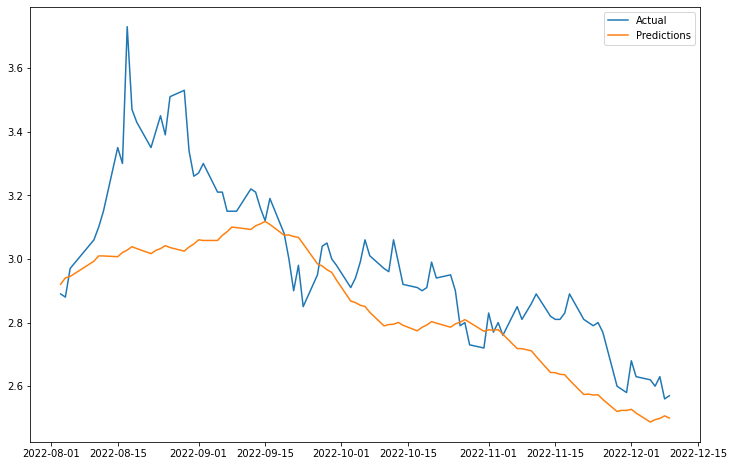

In [18]:
plt.figure(figsize=(12,8))

pred = predictions[predictions['ds'].isin(test['ds'])]

plt.plot(test['ds'],test['y'],label='Actual')
plt.plot(pred['ds'],pred['yhat'],label='Predictions')

plt.legend()
plt.show()

In [20]:
rmse = mean_squared_error(test['y'],pred['yhat'],squared=False)
rmse

0.199918652287141